In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [110]:
data_frame = pd.read_csv('parkinsons.csv')

In [111]:
data_frame.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [112]:
data_frame.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [113]:
data_frame['status'].value_counts()

1    146
0     47
Name: status, dtype: int64

In [114]:
data_frame.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,183.314617,225.758277,146.027532,0.003860,0.000023,0.001926,0.002042,0.005780,0.017584,0.162787,...,0.013173,0.028567,0.011524,24.712787,0.439127,0.696272,-6.783523,0.159626,2.157198,0.121045
1,145.149000,188.612863,106.634021,0.007014,0.000051,0.003771,0.003913,0.011315,0.033742,0.322048,...,0.027675,0.053153,0.029370,20.960116,0.518098,0.725190,-5.326956,0.249083,2.457750,0.234359


In [115]:
X = data_frame.drop(columns=['name','status'],axis=1)
Y = data_frame['status']

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,shuffle=True,random_state=35)

In [117]:
classifier = svm.SVC(kernel='linear')

In [118]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [119]:
train_pred = classifier.predict(X_train)
train_acc_score = accuracy_score(Y_train,train_pred)
print(train_acc_score)

0.8896103896103896


In [120]:
test_pred = classifier.predict(X_test)
test_acc_score = accuracy_score(Y_test,test_pred)
print(test_acc_score)

0.8717948717948718


In [121]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, test_pred)
cnf_matrix

array([[ 5,  4],
       [ 1, 29]], dtype=int64)

Text(0.5, 355.0, 'Predicted label')

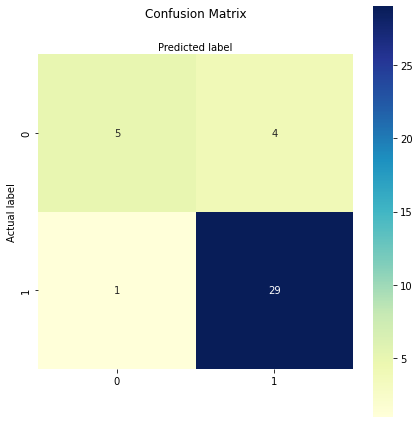

In [122]:
import seaborn as sns
class_names=['D','ND'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
print("Accuracy:",'%.4f' % metrics.accuracy_score(Y_test, test_pred))
print("Precision:",'%.4f' %metrics.precision_score(Y_test, test_pred))
print("Recall:",'%.4f' %metrics.recall_score(Y_test, test_pred))
print("F1 Score:",'%.4f' %metrics.f1_score(Y_test, test_pred))

Accuracy: 0.8718
Precision: 0.8788
Recall: 0.9667
F1 Score: 0.9206


In [124]:
test_data = pd.read_csv('test.csv')

In [125]:
test_data.iloc[1]

MDVP:Fo(Hz)         123.925000
MDVP:Fhi(Hz)        106.656000
MDVP:Flo(Hz)          0.004170
MDVP:Jitter(%)        0.000040
MDVP:Jitter(Abs)      0.001860
MDVP:RAP              0.002700
MDVP:PPQ              0.005580
Jitter:DDP            0.019090
MDVP:Shimmer          0.171000
MDVP:Shimmer(dB)      0.008640
Shimmer:APQ3          0.012230
Shimmer:APQ5          0.019490
MDVP:APQ              0.025920
Shimmer:DDA           0.009550
NHR                  23.079000
HNR                   0.000000
RPDE                  0.603515
DFA                   0.669565
spread1              -5.619070
spread2               0.191576
D2                    2.027228
PPE                   0.215724
Name: 117.226, dtype: float64

In [127]:
test_input = (152.84500,163.30500,75.83600,0.00294,0.00002,0.00121,0.00149,0.00364,0.01828,0.15800,0.01064,0.00972,0.01246,0.03191,0.00609,24.92200,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
)
test_input = np.asarray(test_input)
test_input = test_input.reshape(1,-1)
prediction = classifier.predict(test_input)
print(prediction)

if prediction[0] == 1:
    print("The patient has Parkinson's")
else:
    print("The patient does not have Parkinson's")

[1]
The patient has Parkinson's


c:\Python\Python395\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
